In [31]:
# Importing the necessary libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the data

In [32]:
# Displaying the header of the train data
train_Df = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataClustering.csv')
train_Df.head()

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825


In [33]:
# Printing the datatypes of each columns of the dataset
print(train_Df.dtypes)

x1    float64
x2    float64
x3    float64
x4    float64
dtype: object


In [34]:
# Printing the number of unique vales and null values in each column of the train dataset
for c in train_Df.columns.values:
  val_len = len(pd.unique(train_Df[c]))
  print(c + ' has ' + str(val_len) + ' unique values and is of type ' + str(train_Df[c].dtypes) + ' and has ' + str(train_Df[c].isnull().sum()) + ' null values')

x1 has 351 unique values and is of type float64 and has 0 null values
x2 has 351 unique values and is of type float64 and has 0 null values
x3 has 351 unique values and is of type float64 and has 0 null values
x4 has 351 unique values and is of type float64 and has 0 null values


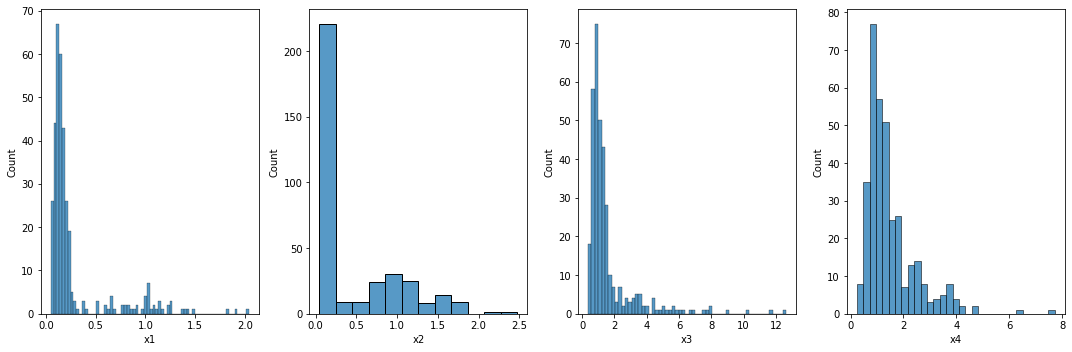

In [35]:
# Plotting histograms
fig, ax = plt.subplots(1, 4, figsize=(15,5))
sns.histplot(train_Df.x1, ax=ax[0])
sns.histplot(train_Df.x2, ax=ax[1])
sns.histplot(train_Df.x3, ax=ax[2])
sns.histplot(train_Df.x4, ax=ax[3])
plt.tight_layout()
plt.show()

As we can see above, those variables have skewed distributions. The x1, x3 and x4 columns have left-skewed distribution and the x2 column also has a skewed distribution. Therefore, we have to transform their distributions.

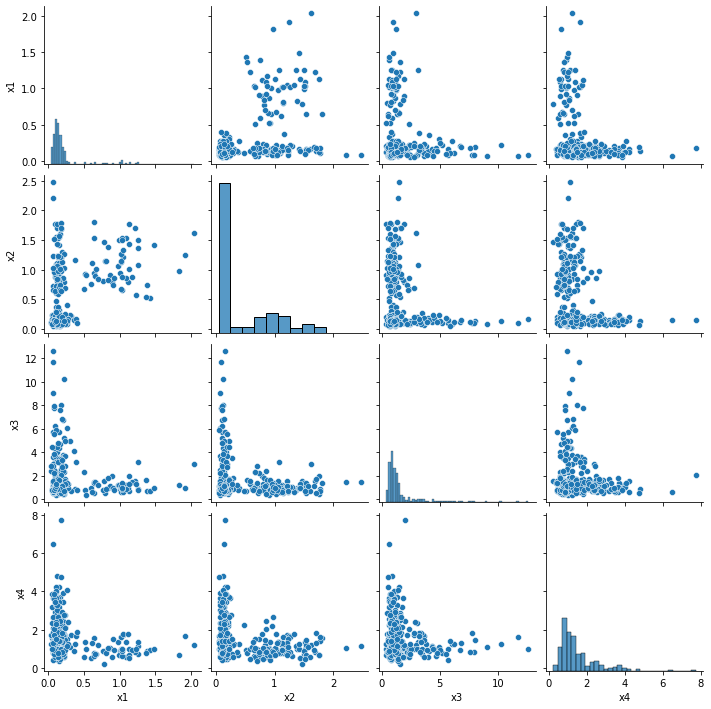

In [36]:
# Scatter plot
sns.pairplot(train_Df)
# to show
plt.show()

It can be seen from the scatter plots as well that the points are skewed.

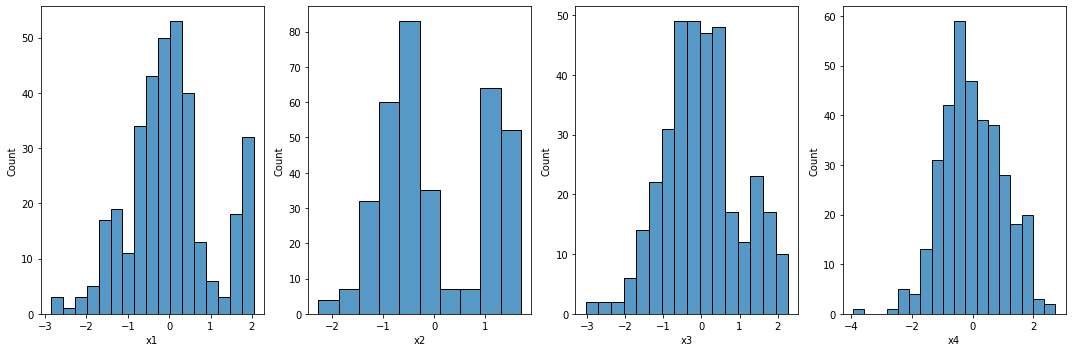

In [37]:
# Power transformation
from sklearn.preprocessing import power_transform
data = pd.DataFrame(train_Df)
Power_data = power_transform(data, method='box-cox')
Power_transf = pd.DataFrame(Power_data,columns=train_Df.columns)
Power_transf.head()
fig, ax = plt.subplots(1, 4, figsize=(15,5))
sns.histplot(Power_transf.x1, ax=ax[0])
sns.histplot(Power_transf.x2, ax=ax[1])
sns.histplot(Power_transf.x3, ax=ax[2])
sns.histplot(Power_transf.x4, ax=ax[3])
plt.tight_layout()
plt.show()

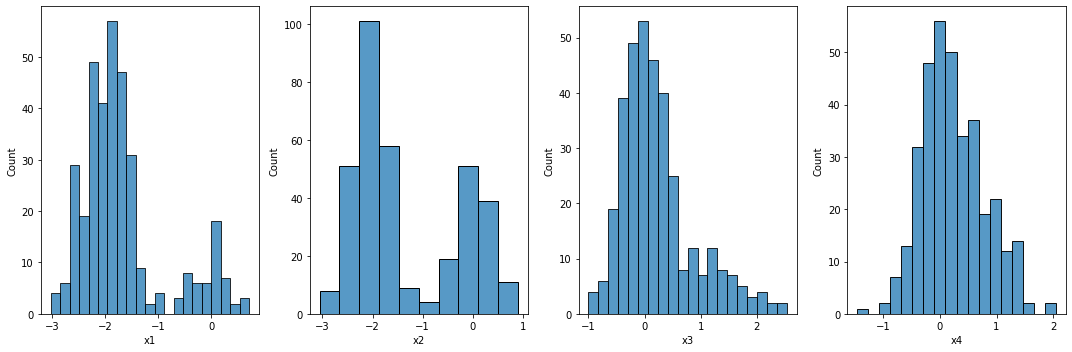

In [38]:
# Lograthmic transformation
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log)
# data = pd.DataFrame(train_Df)
log_transf = transformer.transform(train_Df)
# log_transf = pd.DataFrame(log_data,columns=train_Df.columns)
fig, ax = plt.subplots(1, 4, figsize=(15,5))
sns.histplot(log_transf.x1, ax=ax[0])
sns.histplot(log_transf.x2, ax=ax[1])
sns.histplot(log_transf.x3, ax=ax[2])
sns.histplot(log_transf.x4, ax=ax[3])
plt.tight_layout()
plt.show()

In [39]:
# Silhouette score for power transform
from sklearn.metrics import silhouette_score
kmeans_power_scale = KMeans(n_clusters=5, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(Power_transf)
print('KMeans Silhouette Score: {}'.format(silhouette_score(Power_transf, kmeans_power_scale.labels_, metric='euclidean')))

KMeans Silhouette Score: 0.2926210394605223


In [40]:
# Silhouette score for log transform
kmeans_log_scale = KMeans(n_clusters=5, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(log_transf)
print('KMeans Silhouette Score: {}'.format(silhouette_score(log_transf, kmeans_log_scale.labels_, metric='euclidean')))

KMeans Silhouette Score: 0.37562625904859126


It can be observed that the Silhouette score for log transformation is higher than for power transformation. So, log transformation is used further.

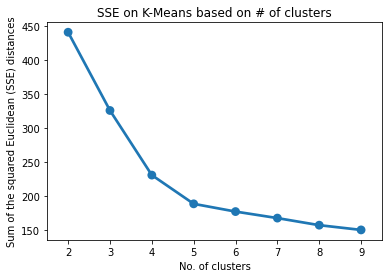

In [41]:
# Elbow method to select appropriate number of clusters
from sklearn.cluster import KMeans
np.random.seed(42)
# Iterating the process
inertia = []
for i in range(2, 10):
  # Instantiate the model
    model = KMeans(n_clusters=i)
  # Fit The Model
    model.fit(log_transf)
  # Extract the error of the model
    inertia.append(model.inertia_)
# Visualizing the results
sns.pointplot(x=list(range(2, 10)), y=inertia)
plt.xlabel('No. of clusters')
plt.ylabel('Sum of the squared Euclidean (SSE) distances')
plt.title('SSE on K-Means based on # of clusters')
plt.show()

It can be seen from the plot that the curve bends at 4 no.of clusters. So, that is the ideal number of clusters for this problem.

In [42]:
np.random.seed(42)
mod = KMeans(n_clusters=4) 
# Fit the model
mod.fit(log_transf) 
# Predict the cluster from the data and save it
cluster = mod.predict(log_transf)
# Appending to the original dataframe
train_Df['cluster'] = cluster
train_Df.head()

,x1,x2,x3,x4,cluster
0,0.832354,1.389428,0.962226,0.993671,2
1,1.256087,1.500487,0.904118,0.738035,2
2,0.976953,1.058524,1.217530,1.357238,2
3,1.014365,1.122684,1.195847,0.984144,2
4,1.041386,1.219014,0.864819,1.720825,2


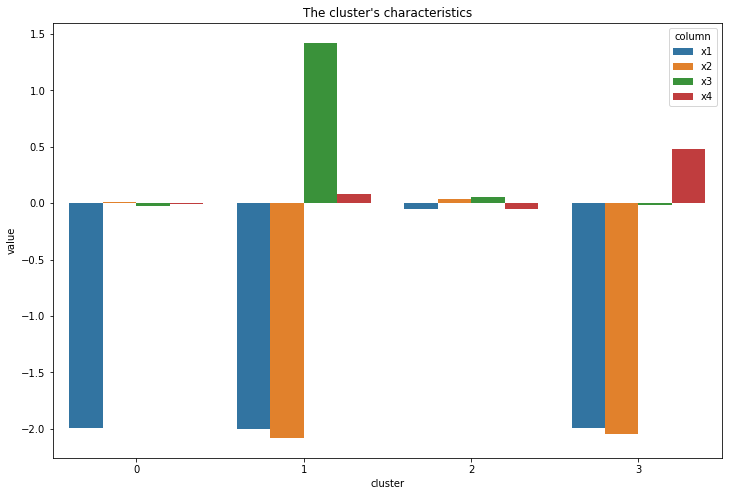

In [43]:
# Visualizing the results
visualize = pd.DataFrame(mod.cluster_centers_) 
visualize = visualize.T
visualize['column'] = ['x1', 'x2', 'x3','x4']
visualize = visualize.melt(id_vars=['column'], var_name='cluster')
visualize['cluster'] = visualize.cluster.astype('category')
plt.figure(figsize=(12, 8))
sns.barplot(x='cluster', y='value', hue='column', data=visualize)
plt.title('The cluster\'s characteristics')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 351 samples in 0.001s...
[t-SNE] Computed neighbors for 351 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 351 / 351
[t-SNE] Mean sigma: 0.562432
[t-SNE] KL divergence after 250 iterations with early exaggeration: 105.864136
[t-SNE] KL divergence after 5000 iterations: 1.237524


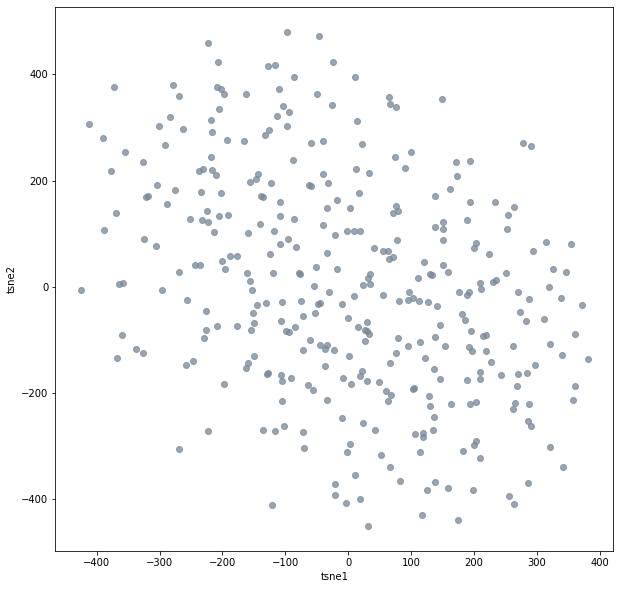

In [44]:
# Dimensionality reduction using t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=5000, learning_rate=200)
tsne_results = tsne.fit_transform(log_transf)
tsne_Df= pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])
# tsne_Df.head()
plt.figure(figsize = (10,10))
plt.scatter(tsne_Df.iloc[:,0],tsne_Df.iloc[:,1],alpha=0.75, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

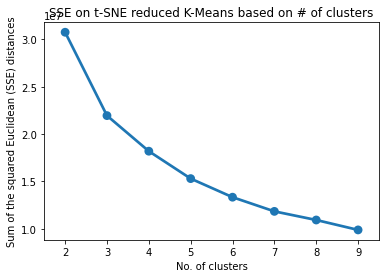

In [45]:
np.random.seed(42)
inertia = []
# Iterating the process
for i in range(2, 10):
  # Instantiate the model
    model = KMeans(n_clusters=i)
  # Fit The Model
    model.fit(tsne_Df)
  # Extract the error of the model
    inertia.append(model.inertia_) # Visualize the model
sns.pointplot(x=list(range(2, 10)), y=inertia)
plt.title('SSE on t-SNE reduced K-Means based on # of clusters')
plt.xlabel('No. of clusters')
plt.ylabel('Sum of the squared Euclidean (SSE) distances')
plt.show()

The idea number of clusters is found to be 4

In [46]:
kmeans_tsne_scale = KMeans(n_clusters=5, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_Df)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_Df, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_Df, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.28673604130744934


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


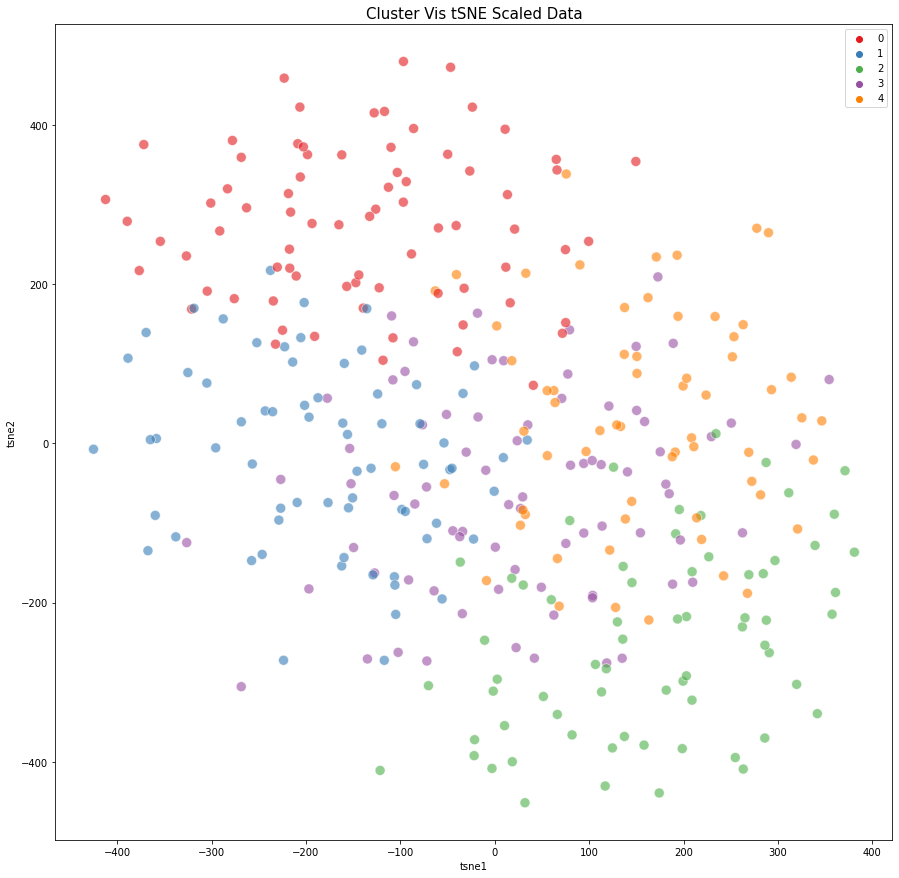

In [47]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

## References
https://medium.com/analytics-vidhya/visualising-embeddings-with-t-sne-b54bf6b635f

https://towardsdatascience.com/visualizing-feature-vectors-embeddings-using-pca-and-t-sne-ef157cea3a42

https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne

http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

https://towardsdatascience.com/cluster-analysis-create-visualize-and-interpret-customer-segments-474e55d00ebb

